# Steps for a Machine Learning Project
1.Import the data
2.Analyze and Clean the data
3.Exploratory Data Analysis
4.Split the data into Training/Tests Sets
5.Create a Model
6.Train the model
7.Make Predictions
8.Evaluate(Visulize) and Improve

### 1.Import the data

In [804]:
## Importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
%matplotlib inline
import seaborn as sns
print()
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
import warnings
warnings.filterwarnings('ignore')
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [805]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [806]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [807]:
print(train.info())
print("="*60)
print(print(test.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

### 2. Analyze and Clean the data

In [808]:
# What does this data set mean.
# The data has been split into two groups:

# training set (train.csv)
# test set(test.csv)
# The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.

# The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.


# Lets describe whats the meaning of the features given the both train & test datasets.

# Variable Definition Key.
# Survival
# 0= No
# 1= Yes
# pclass (Ticket class)

# 1=1st
# 2=2nd
# 3=3rd

# sex
# age

# sibsp (# of siblings / spouses aboard the Titanic)
# parch (# of parents / children aboard the Titanic)
# tickets
# fare
# cabin
# embarked Port of Embarkation.
# C = Cherbourg,
# Q = Queenstown,
# S = Southampton
# pclass: A proxy for socio-economic status (SES)
# This is important to remember and will come in handy for later analysis.
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..

Different variables
Null values

Different variables present in the datasets.
There are four type of variables
Numerical Features: Age, Fare, SibSp and Parch
Categorical Features: Sex, Embarked, Survived and Pclass
Alphanumeric Features: Ticket and Cabin(Contains both alphabets and the numeric value)
Text Features: Name
We really need to tweak these features so we get the desired form of input data

In [809]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [810]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [811]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [812]:
# We see Age and Cabin have a lot of missing value.So First we need to deal with all these NaN values.
# As in Cabin column about 1\3rd of the values are missing.So we get rid of this column.
# sklearn.impute import SimpleImputer will be used to deal with missing values

In [813]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
############ Train Data##########
Imp=SimpleImputer(strategy='median')
new_train=Imp.fit_transform(train.Age.values.reshape(-1,1))
train['Age2'] = new_train
############ Test Data##########
new_test=Imp.fit_transform(test.Age.values.reshape(-1,1))
test['Age2'] = new_test
train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

In [814]:
# #https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
#a=np.array([1,2,3,4,5,6])
# #will make 3 rows as -1 is in row position
#a.reshape(2,-1)  
# print(a.reshape(2,-1))
# #will make 3 coulms as -1 is in column position
#a.reshape(-1,1)


In [815]:
print(train.info())
print('='*60)
print(test.info())
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Age2         891 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0


In [816]:
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)

In [817]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [818]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [819]:
print(train.isnull().sum())
print("=="*60)
print(test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Age2          0
dtype: int64
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age2          0
dtype: int64


In [820]:
train.Embarked.fillna('S',inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
 10  Age2      891 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [821]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
test.Fare.fillna(train.Fare.mean(),inplace=True)

In [822]:
print(train.isnull().sum())
print("=="*60)
print(test.isnull().sum())
print(train.shape)
print(test.shape)


Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Age2        0
dtype: int64
(891, 10)
(418, 9)


In [823]:
# Replacing categorical values and making classes for different ranges of age and fares.
train['Fare']=train['Fare'].astype(int)
train['Age2']=train['Age2'].astype(int)
test['Fare']=test['Fare'].astype(int)
test['Age2']=test['Age2'].astype(int)

train=pd.get_dummies(train,columns=['Sex'],drop_first=True)
train=pd.get_dummies(train,columns=['Embarked'])
test=pd.get_dummies(test,columns=['Sex'],drop_first=True)
test=pd.get_dummies(test,columns=['Embarked'])
print(train.info())
print("=="*60)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   SibSp       891 non-null    int64 
 4   Parch       891 non-null    int64 
 5   Ticket      891 non-null    object
 6   Fare        891 non-null    int64 
 7   Age2        891 non-null    int64 
 8   Sex_male    891 non-null    uint8 
 9   Embarked_C  891 non-null    uint8 
 10  Embarked_Q  891 non-null    uint8 
 11  Embarked_S  891 non-null    uint8 
dtypes: int64(6), object(2), uint8(4)
memory usage: 66.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pclass      418 non-null    int64 
 1   Name        418 non-null    object
 

In [824]:
#Mapping the data.

train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91) &(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train.loc[(train.Fare>31),'Fare']=3


test.loc[test.Fare<=7.91,'Fare']=0
test.loc[(test.Fare>7.91) &(test.Fare<=14.454),'Fare']=1
test.loc[(test.Fare>14.454)&(test.Fare<=31),'Fare']=2
test.loc[(test.Fare>31),'Fare']=3
train.head()

,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Age2,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,22,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,3,38,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,0,26,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,3,35,0,0,0,1
5,0,3,"Allen, Mr. William Henry",0,0,373450,1,35,1,0,0,1


In [825]:
#Creating Age categories in train data
train.loc[ train['Age2'] <= 16, 'Age2']= 0
train.loc[(train['Age2'] > 16) & (train['Age2'] <= 32), 'Age2'] = 1
train.loc[(train['Age2'] > 32) & (train['Age2'] <= 48), 'Age2'] = 2
train.loc[(train['Age2'] > 48) & (train['Age2'] <= 64), 'Age2'] = 3
train.loc[train['Age2'] > 64, 'Age2'] = 4
#Creating Age categories in train data
test.loc[ test['Age2'] <= 16, 'Age2']= 0
test.loc[(test['Age2'] > 16) & (test['Age2'] <= 32), 'Age2'] = 1
test.loc[(test['Age2'] > 32) & (test['Age2'] <= 48), 'Age2'] = 2
test.loc[(test['Age2'] > 48) & (test['Age2'] <= 64), 'Age2'] = 3
test.loc[test['Age2'] > 64, 'Age2'] = 4
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [826]:
train['Family']=train['SibSp'] + train['Parch']
test['Family']=test['SibSp'] + test['Parch']

train.head(10)


,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,,
1,0,3,1,0,0,1,1,0,0,1,1
2,1,1,1,0,3,2,0,1,0,0,1
3,1,3,0,0,0,1,0,0,0,1,0
4,1,1,1,0,3,2,0,0,0,1,1
5,0,3,0,0,1,2,1,0,0,1,0
6,0,3,0,0,1,1,1,0,1,0,0
7,0,1,0,0,3,3,1,0,0,1,0
8,0,3,3,1,2,0,1,0,0,1,4
9,1,3,0,2,1,1,0,0,0,1,2


In [827]:
print(train.info())
print("=="*60)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   SibSp       891 non-null    int64
 3   Parch       891 non-null    int64
 4   Fare        891 non-null    int64
 5   Age2        891 non-null    int64
 6   Sex_male    891 non-null    uint8
 7   Embarked_C  891 non-null    uint8
 8   Embarked_Q  891 non-null    uint8
 9   Embarked_S  891 non-null    uint8
 10  Family      891 non-null    int64
dtypes: int64(7), uint8(4)
memory usage: 59.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   SibSp       418 non-null    int64
 2   Parch       418 non-null    int64
 3   Fare        418 non-null  

### 3. Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.



In [828]:
#1.How many people survived
(train.Survived.value_counts()/len(train))*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [829]:
#2. Mean of each feature group by survival
train.groupby('Survived').mean()
#train[train.Sex_male == 1].count()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
Survived,,,,,,,,,,
0,2.531876,0.553734,0.329690,1.185792,1.31694,0.852459,0.136612,0.085610,0.777778,0.883424
1,1.950292,0.473684,0.464912,1.883041,1.24269,0.318713,0.271930,0.087719,0.640351,0.938596


In [830]:
a = train.groupby('Sex_male').mean()
a
male=a.loc[1,'Survived']
female=a.loc[0,'Survived']


There are a couple of points that should be noted from the statistical overview. They are..

About the survival rate, only 38% passenger survived during that tragedy.
About the survival rate for genders, 74% female passengers survived, while only 19% male passengers survived.

In [831]:
train.corr()

,Survived,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
Survived,1.000000,-0.338481,-0.035322,0.081629,0.301792,-0.044492,-0.543351,0.168240,0.003650,-0.149683,0.016639
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.660699,-0.358005,0.131900,-0.243292,0.221009,0.074053,0.065997
SibSp,-0.035322,0.083081,1.000000,0.414838,0.365893,-0.218846,-0.114631,-0.059528,-0.026354,0.068734,0.890712
Parch,0.081629,0.018443,0.414838,1.000000,0.363097,-0.134014,-0.245489,-0.011069,-0.081228,0.060814,0.783111
Fare,0.301792,-0.660699,0.365893,0.363097,1.000000,0.113812,-0.237585,0.196190,-0.227213,-0.028885,0.431472
Age2,-0.044492,-0.358005,-0.218846,-0.134014,0.113812,1.000000,0.071125,0.030200,-0.079779,0.023749,-0.216525
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.237585,0.071125,1.000000,-0.082853,-0.074115,0.119224,-0.200988
Embarked_C,0.168240,-0.243292,-0.059528,-0.011069,0.196190,0.030200,-0.082853,1.000000,-0.148258,-0.782742,-0.046215
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.227213,-0.079779,-0.074115,-0.148258,1.000000,-0.499421,-0.058592
Embarked_S,-0.149683,0.074053,0.068734,0.060814,-0.028885,0.023749,0.119224,-0.782742,-0.499421,1.000000,0.077359


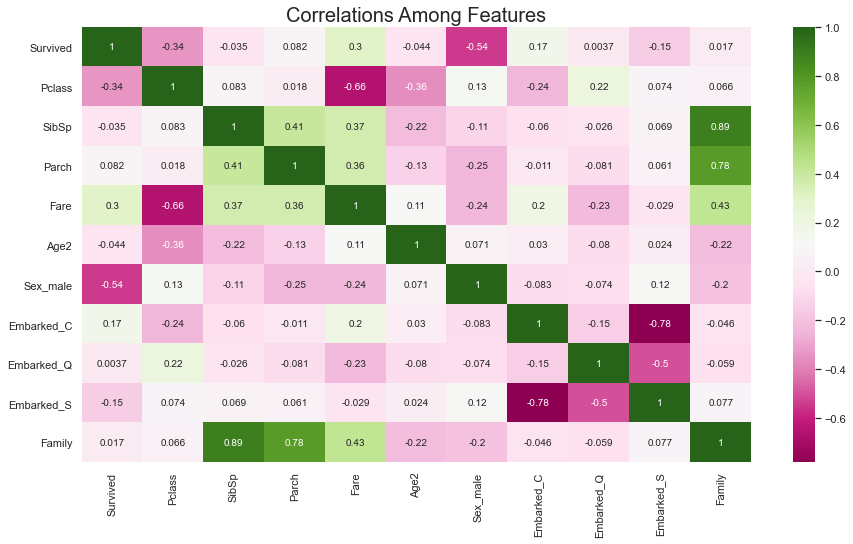

In [832]:
plt.subplots(figsize = (15,8))
sns.heatmap(train.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);
#annot bool optional . If True, write the data value in each cell.
#To change color distribution you may use cmap=YlGnBu

## Positive Correlation Features:

Fare and Survived: 0.26.
There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive.

Negative Correlation Features:

Fare and Pclass: -0.55
This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3).
Gender and Survived: -0.54
Basically is the info of whether the passenger was male or female.
Pclass and Survived: -0.34

In [833]:
train.Age2.value_counts()

1    525
2    186
0    100
3     69
4     11
Name: Age2, dtype: int64

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
Age2,,,,,,,,,,
0,0.550000,2.610000,1.570000,1.140000,1.940000,0.510000,0.190000,0.070000,0.740000,2.710000
1,0.344762,2.476190,0.413333,0.220952,1.182857,0.668571,0.186667,0.118095,0.695238,0.634286
2,0.403226,2.005376,0.365591,0.473118,1.709677,0.639785,0.155914,0.026882,0.817204,0.838710
3,0.434783,1.507246,0.333333,0.289855,2.086957,0.652174,0.275362,0.014493,0.710145,0.623188
4,0.090909,1.727273,0.090909,0.181818,1.636364,1.000000,0.272727,0.181818,0.545455,0.272727


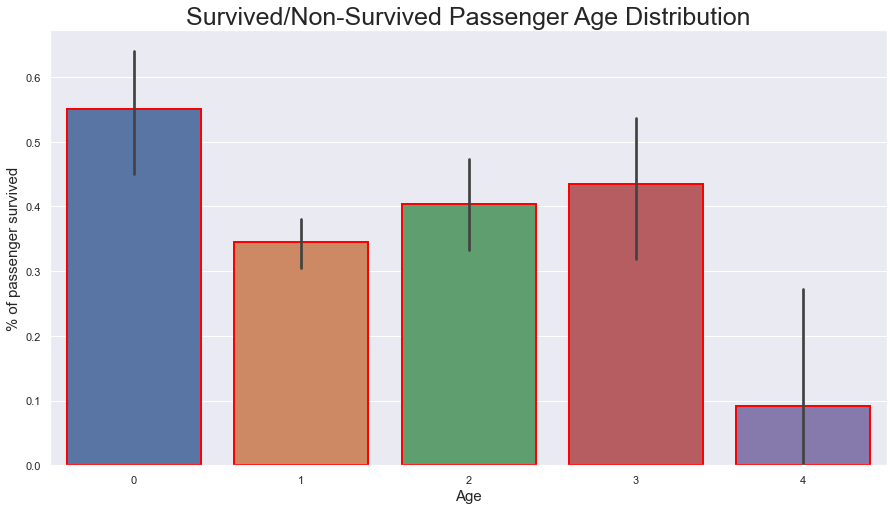

In [834]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Age2", y = "Survived", data=train, edgecolor=(1,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Age Distribution", fontsize = 25)
labels = ['0', '1','2','3','4']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Age",fontsize = 15)
plt.xticks(sorted(train.Age2.unique()), labels)
train.Age2.value_counts()
train.groupby('Age2').mean()


,Survived,Pclass,SibSp,Parch,Fare,Age2,Embarked_C,Embarked_Q,Embarked_S,Family
Sex_male,,,,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,1.815287,1.210191,0.232484,0.114650,0.652866,1.343949
1,0.188908,2.389948,0.429809,0.235702,1.256499,1.331023,0.164645,0.071057,0.764298,0.665511


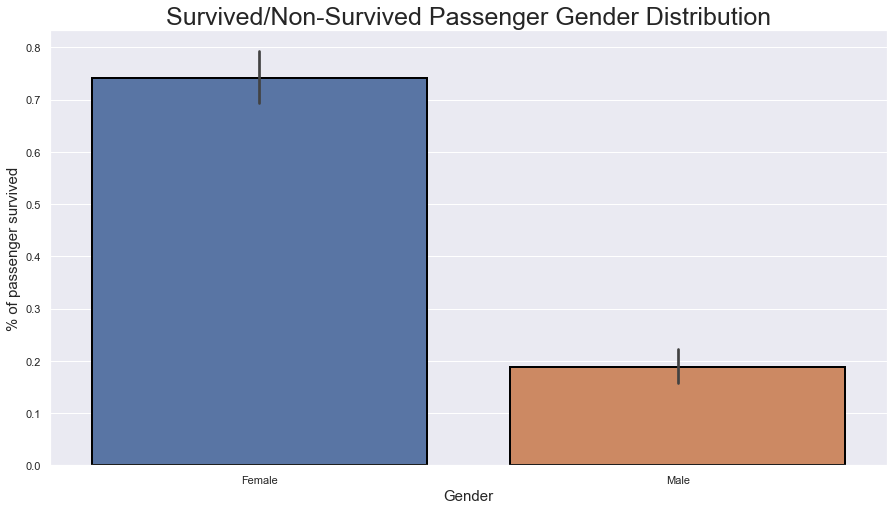

In [835]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex_male", y = "Survived", data=train, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train.Sex_male.unique()), labels)
train.groupby('Sex_male').mean()


This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

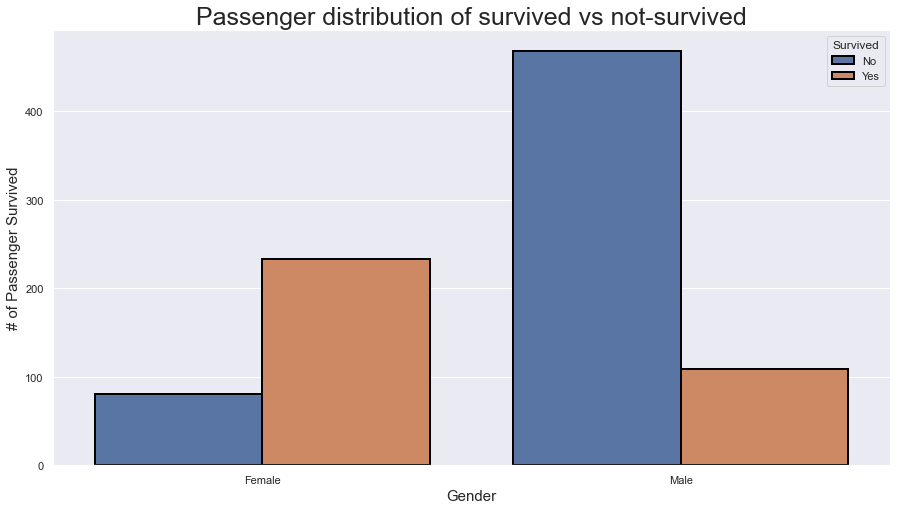

In [836]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex_male',data=train,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')

This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

Summary

As we suspected, female passengers have survived at a much better rate than male passengers.
It seems about right since females and children were the priority.

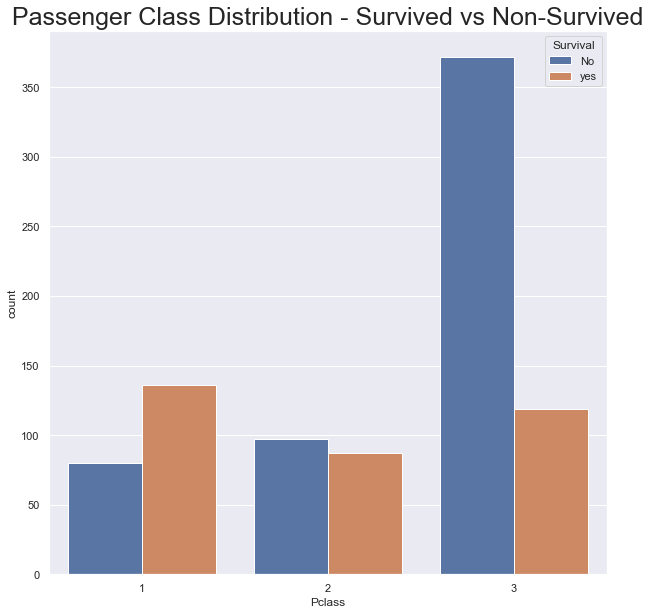

In [837]:
plt.subplots(figsize = (10,10))
ax=sns.countplot(x='Pclass',hue='Survived',data=train)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

([<matplotlib.axis.XTick at 0x7ff5ac31ed90>,
 [Text(0, 0, 'First'), Text(0, 0, 'Second'), Text(0, 0, 'Third')])

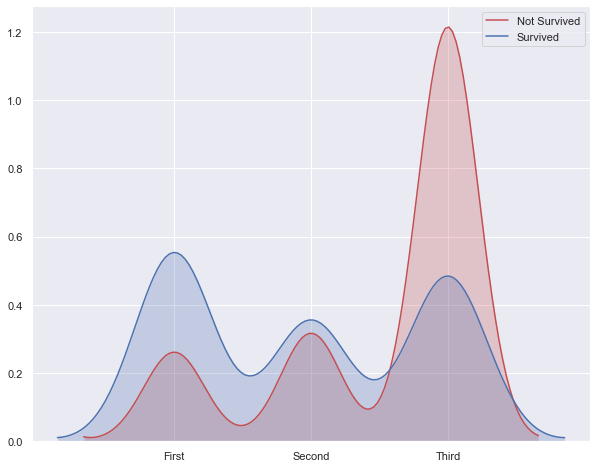

In [838]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

Text(0.5, 0, 'Fare')

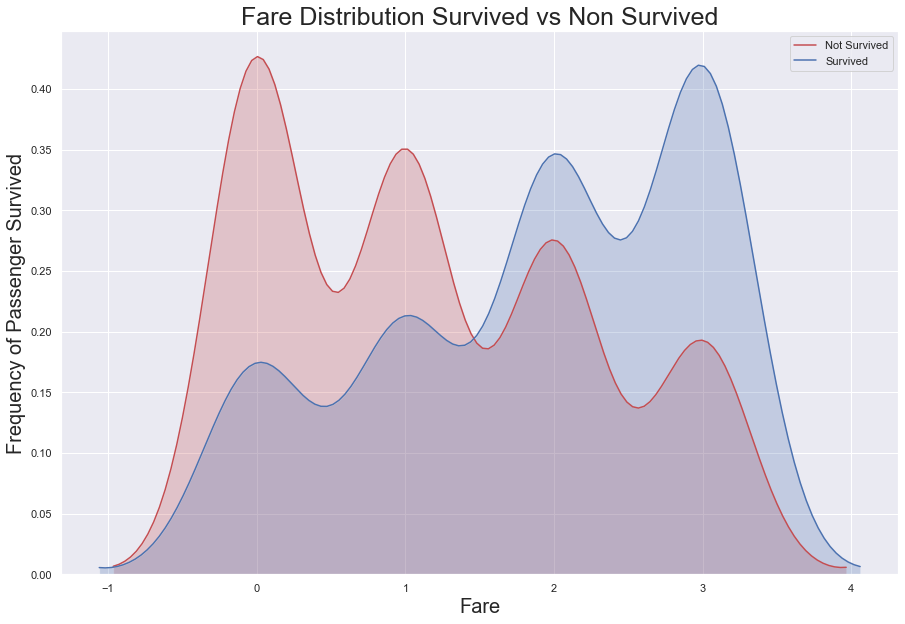

In [839]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

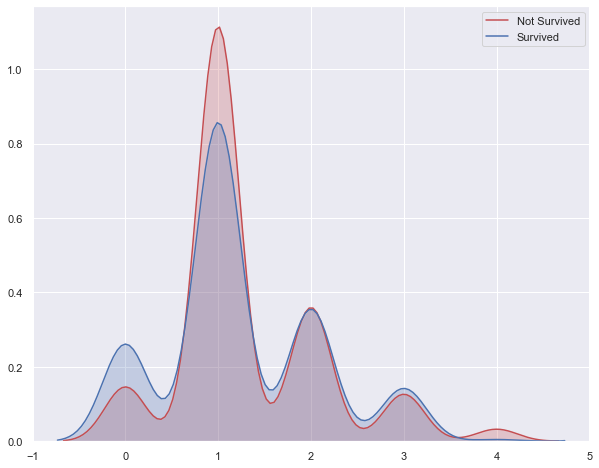

In [840]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Age2'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age2'],color='b',shade=True,label='Survived')

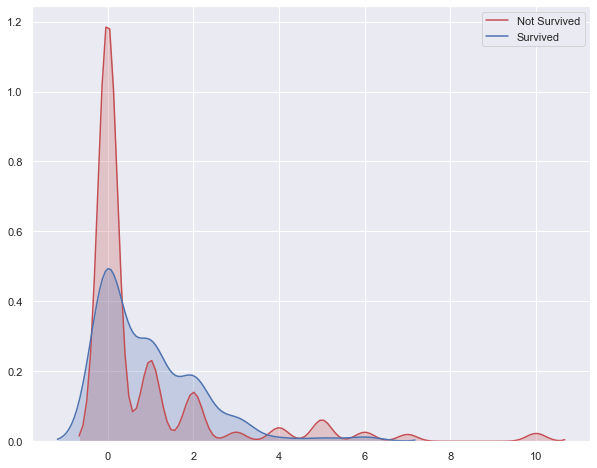

In [841]:
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train.loc[(train['Survived']==0),'Family'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Family'],color='b',shade=True,label='Survived')

The above graph shows that lines of both i.e. survived or not survived shows same behavior irrespective to size of the family, So we can conculde that Family size does not have any impact on survival.

In [842]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

In [843]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
#from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    #XGBClassifier(),
    RandomForestClassifier(n_estimators=100, max_features=3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    

The stratify parameter asks whether you want to retain the same proportion of classes in the train and test sets that are found in the entire original dataset.

For example, if there are 100 observations in the entire original dataset of which 80 are class 𝑎 and 20 are class 𝑏 and you set stratify = True, with a .7 : .3 train-test split, you will get a training set with 56 examples of class 𝑎 and 14 examples of class 𝑏.
    
 n_split    parameter performs the iteration of dividind data into train and test 
for train_index, test_index in sss.split(X, y): (as split size was 10 so the loop will execute 10 times)
Everytime the data will be shuffled and the propotion of classes will be maintained


In [844]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)


acc_dict = {}
#sss.split returns 623 indexes for training and 268 for testing. Using these indexes we will retrieve data from
# X using X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
for train_index, test_index in sss.split(X, y):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
#In each iteration one set of training data is created (623 records i.e 70% of 899 records) and
# one set of testing data is created (268 records i.e 30% of 899 records). This X,y combination
#is passed to classifiers in each iteration. The total iteration will be 10 as mentioned in n_splits.

# classifiers list contains names of the classifieirs along with intializations (which is first step before calling
# .fit argument. Where as here we only need names so we get it by clf.__class__.__name__)     
    
    for clf in classifiers:
      
        name = clf.__class__.__name__
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc
for cf in acc_dict:
    acc_dict[cf]=acc_dict[cf]/10
    

In [845]:
acc_dict

{'KNeighborsClassifier': 0.7682835820895523,
 'SVC': 0.812686567164179,
 'DecisionTreeClassifier': 0.7899253731343283,
 'RandomForestClassifier': 0.8063432835820896,
 'AdaBoostClassifier': 0.7906716417910447,
 'GradientBoostingClassifier': 0.8115671641791046,
 'GaussianNB': 0.744776119402985,
 'LinearDiscriminantAnalysis': 0.7888059701492537,
 'QuadraticDiscriminantAnalysis': 0.737313432835821,
 'LogisticRegression': 0.7921641791044776}

In [846]:
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(list(acc_dict.items()),columns=log_cols)
log.head(10)

,Classifier,Accuracy
0,KNeighborsClassifier,0.768284
1,SVC,0.812687
2,DecisionTreeClassifier,0.789925
3,RandomForestClassifier,0.806343
4,AdaBoostClassifier,0.790672
5,GradientBoostingClassifier,0.811567
6,GaussianNB,0.744776
7,LinearDiscriminantAnalysis,0.788806
8,QuadraticDiscriminantAnalysis,0.737313
9,LogisticRegression,0.792164


In [847]:
classifier=SVC()
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)

SVC()

In [848]:
Result=classifier.predict(test)
len(Result)

418

### Question

c=SVC()
Xt=train.iloc[:,1:]
yt=train['Survived'].astype(int)
c.fit(Xt,yt)


In [849]:
test.head()

,Pclass,SibSp,Parch,Fare,Age2,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,,,
892,3,0,0,0,2,1,0,1,0,0
893,3,1,0,0,2,0,0,0,1,1
894,2,0,0,1,3,1,0,1,0,0
895,3,0,0,1,1,1,0,0,1,0
896,3,1,1,1,1,0,0,0,1,2


In [850]:
len(test.index)

418

In [851]:
col1 = test.index
col2 = Result
gender_submission = pd.DataFrame()
gender_submission['PassengerId'] = test.index
gender_submission['Survived'] = Result
gender_submission.set_index('PassengerId',inplace=True)



In [852]:
gender_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [853]:
gender_submission.to_csv("gender_submission.csv")